## Definición del problema

En este ejemplo se hizo uso de una muestra de dígitos escritos a mano por diferentes personas, se construira un sistema de reconocimiento haciendo uso del algoritmo k-means. 


### Solución

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

digits = load_digits()
data = scale(digits.data)

### Impresión de las imágenes

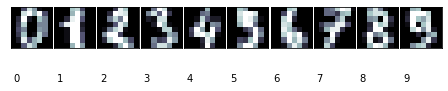

In [4]:
def print_digits(images, y, max_n = 10):
    fig = plt.figure(figsize = (12, 12))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    i = 0
    while i < max_n and i < images.shape[0]:
        p = fig.add_subplot(20, 20, i + 1, xticks = [], yticks = [])
        p.imshow(images[i], cmap = plt.cm.bone)
        p.text(0, 14, str(y[i]))
        i = i + 1
        
print_digits(digits.images, digits.target, max_n = 10)

### Particionamiento de los datos

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(data,
                                                                              digits.target, digits.images, test_size = 0.25,
                                                                             random_state = 42)
n_samples, n_features = X_train.shape
n_digits = len(np.unique(y_train))
labels = y_train

### Entrenamiento del modelo

In [6]:
from sklearn.cluster import KMeans
clf = KMeans(init = "k-means++", n_clusters = 10, random_state = 42)
clf.fit(X_train)

KMeans(n_clusters=10, random_state=42)

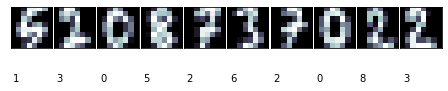

In [7]:
print_digits(images_train, clf.labels_, max_n = 10)

### Pronóstico

In [8]:
y_pred = clf.predict(X_test)

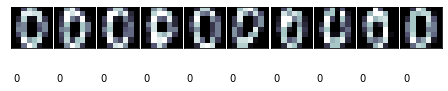

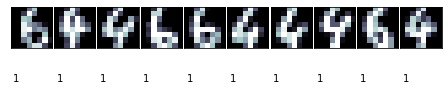

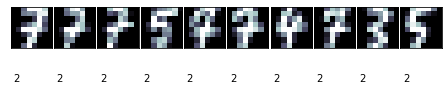

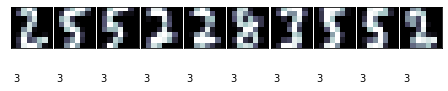

<Figure size 864x864 with 0 Axes>

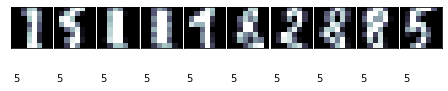

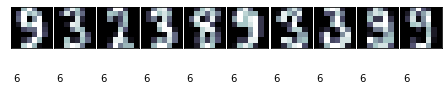

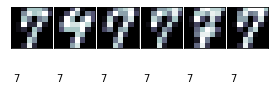

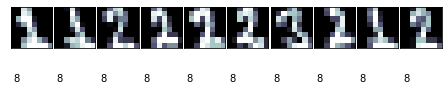

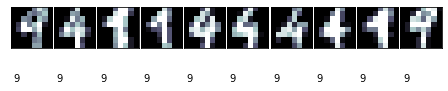

In [9]:
def print_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    print_digits(images, y_pred, max_n = 10)
    
for i in range(10):
    print_cluster(images_test, y_pred, i)

### Evaluación

In [10]:
from sklearn import metrics
print("Adjusted rand score: {:.2}".format(metrics.adjusted_rand_score(y_test, y_pred)))


Adjusted rand score: 0.4
